In [1]:
import math

from drawsvg import Drawing, Path
import hyperbolic as hyper

In [2]:
l = hyper.euclid.Line(0,0,2,2)
p = l.make_perpendicular(2,0, length=math.sqrt(2))

print(p)
print(math.hypot(p.x2-p.x1, p.y2-p.y1))
print(math.atan2(p.y2-p.y1, p.x2-p.x1)*180/math.pi)

Line(1.0, 1.0, 0.0, 2.0)
1.4142135623730951
135.0


In [3]:
c1 = hyper.euclid.Circle(-1,0,2)
c2 = hyper.euclid.Circle(1,0,3)
hyper.euclid.Line.radical_axis(c1,c2)

Line(-1.25, 0.0, -1.25, 1.0)

In [4]:
c1 = hyper.euclid.Circle(-1000-1,0,1000)
c2 = hyper.euclid.Circle(1000+2,10,1000)
hyper.euclid.Line.radical_axis(c1,c2)

Line(0.5, 5.0, 0.495, 6.0)

Single (0.29289321881345254, -0.29289321881345254)
0.04674578112205652 -0.697830520748038 1.6455619111856357 -1.763707940790424
-0.40000000000000036 -0.3999999999999997


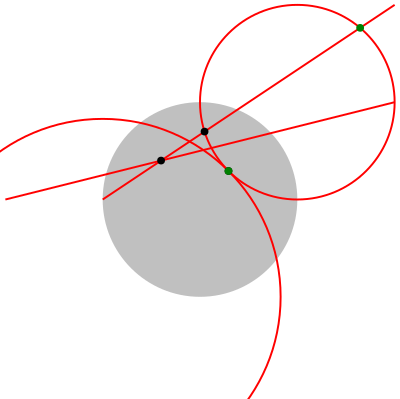

In [5]:
circ1 = hyper.euclid.Circle(-1,1,math.sqrt(8)-1)
circ2 = hyper.euclid.Circle(1,-1,1)
line1 = hyper.euclid.Line(2,-2, -1,0)
line2 = hyper.euclid.Line(-2,0, 2,-1)
#line1 = hyper.euclid.OriginLine(4,-1)

try:
    x1, y1, x2, y2 = hyper.euclid.intersection.circle_circle(circ1, circ2)
    print(x1, y1, x2, y2)
except hyper.euclid.SingleIntersection as e:
    print('Single', e)
    x1, y1 = e.args
    x2, y2 = x1, y1
except hyper.euclid.NoIntersection:
    print('No intersection')
    x1, y1, x2, y2 = (float('nan'),)*4
except hyper.euclid.InfiniteIntersections as e:
    print('Infinite')
    x1, y1, x2, y2 = (float('nan'),)*4

try:
    x1b, y1b, x2b, y2b = hyper.euclid.intersection.circle_line(circ2, line1)
    print(x1b, y1b, x2b, y2b)
except hyper.euclid.SingleIntersection as e:
    print('Single', e)
    x1b, y1b = e.args
    x2b, y2b = x1, y1
except hyper.euclid.NoIntersection:
    print('No intersection')
    x1b, y1b, x2b, y2b = (float('nan'),)*4

try:
    x1c, y1c = hyper.euclid.intersection.line_line(line1, line2)
    print(x1c, y1c)
except hyper.euclid.NoIntersection:
    print('No intersection')
    x1c, y1c = (float('nan'),)*2
except hyper.euclid.InfiniteIntersections as e:
    print('Infinite')
    x1c, y1c = (float('nan'),)*2

d = Drawing(4.1, 4.1, origin='center')
d.draw(hyper.euclid.Circle(0, 0, 1), fill='silver')
d.draw(circ1, stroke='red', stroke_width=0.02, fill='none')
d.draw(circ2, stroke='red', stroke_width=0.02, fill='none')
d.draw(line1, stroke='red', stroke_width=0.02, fill='none')
d.draw(line2, stroke='red', stroke_width=0.02, fill='none')
d.draw(hyper.euclid.Circle(x1, y1, 0.04), fill='black')
d.draw(hyper.euclid.Circle(x2, y2, 0.04), fill='green')
d.draw(hyper.euclid.Circle(x1b, y1b, 0.04), fill='black')
d.draw(hyper.euclid.Circle(x2b, y2b, 0.04), fill='green')
d.draw(hyper.euclid.Circle(x1c, y1c, 0.04), fill='black')

d.set_render_size(w=400)
d.save_svg('images/euclidTest.svg')
d